In [40]:
import pandas as pd
from tkinter import font
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Reading data

In [2]:
data = pd.read_csv("houses_to_rent_v2.csv")

In [3]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [5]:
data.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [6]:
data.animal.unique()

array(['acept', 'not acept'], dtype=object)

In [7]:
data.furniture.unique()

array(['furnished', 'not furnished'], dtype=object)

In [8]:
data.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [9]:
data_MOD=None

In [10]:
data_MOD=data.copy()

In [11]:
data_MOD.animal=data.animal.replace('acept', True)

In [12]:
data_MOD.animal=data_MOD.animal.replace('not acept', False)

In [13]:
data_MOD.furniture=data_MOD.furniture.replace('furnished', True)

In [14]:
data_MOD.furniture=data_MOD.furniture.replace('not furnished', False)

In [15]:
data_MOD.floor=data_MOD.floor.replace('-', "1")

In [16]:
data_MOD.animal.unique()

array([ True, False])

In [17]:
data_MOD.furniture.unique()

array([ True, False])

In [18]:
data_MOD.floor.unique()

array(['7', '20', '6', '2', '1', '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [19]:
data_MOD.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836


In [20]:
data_MOD.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [21]:
data_MOD = data_MOD.rename(columns={'parking spaces':'parking_spaces','hoa (R$)':'hoa', 'rent amount (R$)':'rent_amount',
       'property tax (R$)':'property_tax', 'fire insurance (R$)':'fire_insurance', 'total (R$)':'total'})

In [22]:
data_MOD.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836


In [23]:
data_MOD.tail()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
10687,Porto Alegre,63,2,1,1,5,False,True,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,True,False,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,False,True,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,True,True,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,1,True,False,0,1400,165,22,1587


# Correlation

In [24]:
data_corr = data_MOD.copy()

In [25]:
del data_corr["total"]

In [26]:
del data_corr["rent_amount"]

In [27]:
data_corr

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,property_tax,fire_insurance
0,São Paulo,70,2,1,1,7,True,True,2065,211,42
1,São Paulo,320,4,4,0,20,True,False,1200,1750,63
2,Porto Alegre,80,1,1,1,6,True,False,1000,0,41
3,Porto Alegre,51,2,1,0,2,True,False,270,22,17
4,São Paulo,25,1,1,0,1,False,False,0,25,11
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,False,True,402,24,22
10688,São Paulo,285,4,4,4,17,True,False,3100,973,191
10689,Rio de Janeiro,70,3,3,0,8,False,True,980,332,78
10690,Rio de Janeiro,120,2,2,2,8,True,True,1585,279,155


In [28]:
def correlationPlot(plotTitle, correlationDF, size=20):
    plt.figure(figsize=(size, size))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(correlationDF)
    ax.set_title(plotTitle, fontsize = 20)
    plt.show()

def correlationMatrix(correlationDF):
    print("\n# Correlation Matrix:\n", correlationDF)

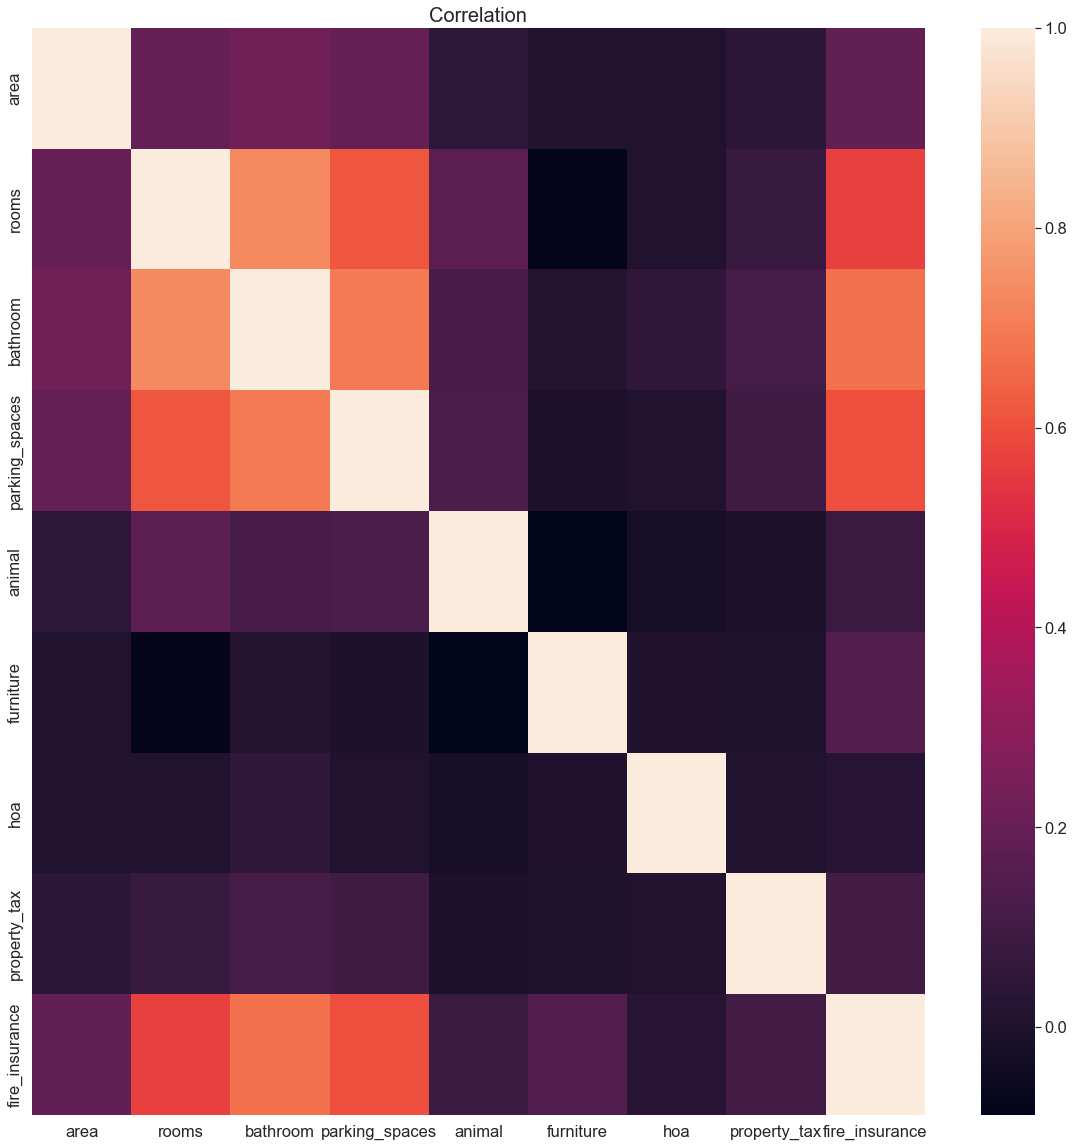

In [29]:
correlationPlot("Correlation", data_corr.corr())

In [30]:
correlationMatrix(data_corr.corr())


# Correlation Matrix:
                     area     rooms  bathroom  parking_spaces    animal  \
area            1.000000  0.193796  0.226766        0.193983  0.039626   
rooms           0.193796  1.000000  0.733763        0.617510  0.172190   
bathroom        0.226766  0.733763  1.000000        0.697379  0.118255   
parking_spaces  0.193983  0.617510  0.697379        1.000000  0.127432   
animal          0.039626  0.172190  0.118255        0.127432  1.000000   
furniture       0.008175 -0.080694  0.017938       -0.004720 -0.087972   
hoa             0.006890  0.007139  0.050271        0.009321 -0.022008   
property_tax    0.039059  0.075252  0.109253        0.098378 -0.003006   
fire_insurance  0.188078  0.565148  0.676399        0.597348  0.079152   

                furniture       hoa  property_tax  fire_insurance  
area             0.008175  0.006890      0.039059        0.188078  
rooms           -0.080694  0.007139      0.075252        0.565148  
bathroom         0.017938  0.05

# Spliting data

In [32]:
attributes = ["area","rooms","bathroom","parking_spaces","animal", "furniture","hoa","property_tax","fire_insurance"]
predictAttribute = ['rent_amount']

In [34]:
X = data_MOD[attributes].values
Y = data_MOD[predictAttribute].values

In [ ]:
X_training = None
X_test= None
Y_training = None
Y_test = None

In [41]:
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [45]:
print('# Split data sizes:')
print("- Training data: {0:0.2f}%".format((len(X_training)/len(data_MOD.index)) * 100))
print("- Test data: {0:0.2f}%".format((len(X_test)/len(data_MOD.index)) * 100))

# Split data sizes:
- Training data: 70.00%
- Test data: 30.00%


# Modeling